In [4]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


In [6]:
print('Size of train  data {}'.format(x_train.shape))
print('Size of test data {}'.format(x_test.shape))
print('Size of train class {}'.format(y_train.shape))
print('Size of train class {}'.format(y_test.shape))

Size of train  data (50000, 32, 32, 3)
Size of test data (10000, 32, 32, 3)
Size of train class (50000, 1)
Size of train class (10000, 1)


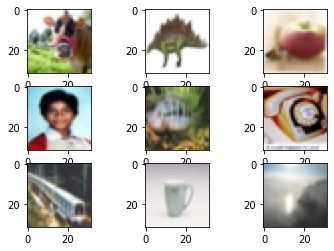

In [7]:
for i in range(9):
  ax=plt.subplot(330+i+1)
  idx=plt.imshow(x_train[i])
plt.show()

In [8]:
#chuẩn hóa các đầu vào từ 0 đến 255 thành giữa 0 và 1 bằng cách chia cho 255
from tensorflow.keras.utils import to_categorical
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test/=255
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [9]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

In [10]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

In [11]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

In [12]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='softmax'))

In [13]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
history = model.fit(x_train,y_train,batch_size=128,epochs=400,verbose=1,validation_data=(x_test,y_test))

Epoch 1/400
391/391 [==============================] - 22s 30ms/step - loss: 4.2219 - accuracy: 0.0598 - val_loss: 3.7645 - val_accuracy: 0.1195
Epoch 2/400
391/391 [==============================] - 11s 28ms/step - loss: 3.5108 - accuracy: 0.1618 - val_loss: 3.2448 - val_accuracy: 0.2192
Epoch 3/400
391/391 [==============================] - 10s 27ms/step - loss: 3.0419 - accuracy: 0.2515 - val_loss: 2.9393 - val_accuracy: 0.2729
Epoch 4/400
391/391 [==============================] - 10s 26ms/step - loss: 2.6969 - accuracy: 0.3178 - val_loss: 2.6954 - val_accuracy: 0.3180
Epoch 5/400
391/391 [==============================] - 10s 27ms/step - loss: 2.4172 - accuracy: 0.3738 - val_loss: 2.6008 - val_accuracy: 0.3451
Epoch 6/400
391/391 [==============================] - 11s 28ms/step - loss: 2.1876 - accuracy: 0.4272 - val_loss: 2.5371 - val_accuracy: 0.3605
Epoch 7/400
391/391 [==============================] - 10s 27ms/step - loss: 1.9449 - accuracy: 0.4823 - val_loss: 2.5023 - val_ac

In [16]:
from keras.models import load_model
model.save('Cifar100_CNN.h5')
model5=load_model('Cifar100_CNN.h5')

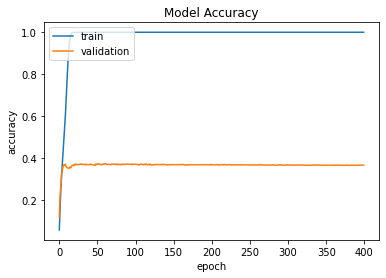

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

In [18]:
Label = ['apple', 'aquarium_fish', 'baby', 'bear','beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle','bowl', 'boy', 
'bridge', 'bus', 'butterfly', 'camel','can', 'castle', 'caterpillar', 'cattle', 'chair','chimpanzee', 'clock', 
'cloud', 'cockroach', 'couch','crab', 'crocodile', 'cup', 'dinosaur', 'dolphin','elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
'house', 'kangaroo', 'keyboard', 'lamp','lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
'otter', 'palm_tree', 'pear', 'pickup_truck','pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket','rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
'skyscraper', 'snail', 'snake', 'spider', 'squirrel','streetcar', 'sunflower', 'sweet_pepper', 'table',
'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
'willow_tree', 'wolf', 'woman', 'worm']

'tiger'

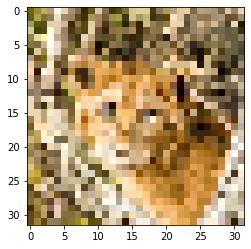

In [25]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

filename = 'su tu.jpg'

img= load_img(filename,target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
Label[np.argmax(model.predict(img))]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Cifar100-CNN.ipynb')

Mounted at /content/drive
--2022-05-18 09:15:36--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-18 09:15:36 (27.3 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Cifar100-CNN.ipynb to pdf
[NbConvertApp] Support files will be in Cifar100-CNN_files/
[NbConvertApp] Making directory ./Cifar100-CNN_files
[NbConvertApp] Making directory ./Cifar100-CNN_files
[NbConvertApp] Writing 90896 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'